# <a href="https://mipt-stats.gitlab.io/courses/python.html">Python для анализа данных</a>

## Библиотека pandas

<img src="https://mipt-stats.gitlab.io/images/m/pandas.gif" width="800"><br>


Pandas &mdash; пакет для статистической обработки данных, по функциональности близкий к SQL и R. Включает в себя функциональность работы с базами данных и таблицами Excel.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import warnings
warnings.simplefilter("ignore", FutureWarning)

### 1. Тип данных `Series`

Одномерный набор данных. Отсутствующий данные записываются как `np.nan`. Например, в этот день термометр сломался или метеоролог был пьян. При вычислении среднего и других операций соответствующие функции не учитывают отсутствующие значения.

In [2]:
l = [1, 3, 5, np.nan, 6, 8]
s = pd.Series(l)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

**Полезно знать:** Для поиска пропусков есть специальный метод `.isna()`. Он эквивалентен конструкции `s != s`

In [3]:
s.isna()

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

Основная информация о наборе данных: количество записей, среднее, стандартное отклонение, минимум, нижний квартиль, медиана, верхний квартиль, максимум, а так же тип данных.

In [4]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

В данном примере обычная индексация.

In [5]:
s[2]

5.0

In [6]:
s[2] = 7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [8]:
s1 = s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [9]:
s2 = s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64

В сумме `s1+s2` складываются данные **с одинаковыми индексами**. Поскольку в `s1` нет данного и индексом 0, а в `s2` &mdash; с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [10]:
s1 + s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64

К наборам данных можно применять функции из `numpy`.

In [11]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

При создании набора данных `s` мы не указали, что будет играть роль индекса. По умолчанию это последовательность неотрицательных целых чисел 0, 1, 2, ...

In [12]:
s.index

RangeIndex(start=0, stop=6, step=1)

Но можно создавать наборы данных с индексом, заданным списком.

In [13]:
i = list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [14]:
s = pd.Series(l, index=i)
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [15]:
s['c']

5.0

Если индекс &mdash; строка, то вместо `s['c']` можно писать `s.c`.

In [16]:
s.c

5.0

Набор данных можно создать из словаря.

In [17]:
s = pd.Series({'a':1, 'b':2, 'c':0})
s

a    1
b    2
c    0
dtype: int64

Можно отсортировать набор данных.

In [18]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат или времён измерения и т.д..

In [19]:
d = pd.date_range('20160101', periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
s = pd.Series(sps.norm.rvs(size=10), index=d)
s

2016-01-01    1.166103
2016-01-02   -0.541579
2016-01-03    0.529053
2016-01-04   -0.449775
2016-01-05    0.445704
2016-01-06    0.728056
2016-01-07    1.018042
2016-01-08    0.490312
2016-01-09   -1.265174
2016-01-10   -0.468581
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [21]:
s > 0

2016-01-01     True
2016-01-02    False
2016-01-03     True
2016-01-04    False
2016-01-05     True
2016-01-06     True
2016-01-07     True
2016-01-08     True
2016-01-09    False
2016-01-10    False
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть `True`.

In [22]:
s[s > 0]

2016-01-01    1.166103
2016-01-03    0.529053
2016-01-05    0.445704
2016-01-06    0.728056
2016-01-07    1.018042
2016-01-08    0.490312
dtype: float64

Кумулятивные максимумы &mdash; от первого элемента до текущего. Первое значение кумулятивного максимума совпадает с первым значением исходного массива. Далее значение $k$-го элемента есть максимум среди элементов до $k$-го включительно.

In [23]:
s.cummax()

2016-01-01    1.166103
2016-01-02    1.166103
2016-01-03    1.166103
2016-01-04    1.166103
2016-01-05    1.166103
2016-01-06    1.166103
2016-01-07    1.166103
2016-01-08    1.166103
2016-01-09    1.166103
2016-01-10    1.166103
Freq: D, dtype: float64

Кумулятивные суммы. Первое значение кумулятивной суммы совпадает с первым значением исходного массива. Далее значение $k$-го элемента есть сумма элементов до $k$-го включительно.

In [24]:
s.cumsum()

2016-01-01    1.166103
2016-01-02    0.624524
2016-01-03    1.153577
2016-01-04    0.703802
2016-01-05    1.149506
2016-01-06    1.877562
2016-01-07    2.895604
2016-01-08    3.385915
2016-01-09    2.120741
2016-01-10    1.652160
Freq: D, dtype: float64

Произвольные функции кумулятивным способом можно считать с помощью конструкции `expanding`. Например, так можно посчитать кумулятивные медианы. Будет не быстрее, чем вручную, но аккуратнее.

In [25]:
s.expanding().apply(np.median, raw=True)

2016-01-01    1.166103
2016-01-02    0.312262
2016-01-03    0.529053
2016-01-04    0.039639
2016-01-05    0.445704
2016-01-06    0.487378
2016-01-07    0.529053
2016-01-08    0.509682
2016-01-09    0.490312
2016-01-10    0.468008
Freq: D, dtype: float64

Если вы хотите посчитать разности соседних элементов, воспользуйтесь методом `diff`.  Ключевое слово `periods` отвечает за то, с каким шагом будут считаться разности.

In [26]:
s.diff()

2016-01-01         NaN
2016-01-02   -1.707682
2016-01-03    1.070631
2016-01-04   -0.978827
2016-01-05    0.895479
2016-01-06    0.282353
2016-01-07    0.289985
2016-01-08   -0.527730
2016-01-09   -1.755486
2016-01-10    0.796593
Freq: D, dtype: float64

Результат будет иметь тот же размер, но в начале появятся пропущенные значения.  От них можно избавиться при помощи метода `dropna`.

In [27]:
s.diff().dropna()

2016-01-02   -1.707682
2016-01-03    1.070631
2016-01-04   -0.978827
2016-01-05    0.895479
2016-01-06    0.282353
2016-01-07    0.289985
2016-01-08   -0.527730
2016-01-09   -1.755486
2016-01-10    0.796593
Freq: D, dtype: float64

**Упражнение**  
Посчитайте кумулятивное среднее квадратов разностей соседних элементов набора `s`.

In [43]:
# МОЙ КОД
s.diff().dropna().apply(np.square).expanding().apply(np.mean)

2016-01-02    2.916177
2016-01-03    2.031214
2016-01-04    1.673511
2016-01-05    1.455603
2016-01-06    1.180427
2016-01-07    0.997705
2016-01-08    0.894961
2016-01-09    1.168307
2016-01-10    1.109002
Freq: D, dtype: float64

In [45]:
# КОД СЕМИНАРА
s.diff().dropna().expanding().apply(lambda x: np.mean(x**2))

2016-01-02    2.916177
2016-01-03    2.031214
2016-01-04    1.673511
2016-01-05    1.455603
2016-01-06    1.180427
2016-01-07    0.997705
2016-01-08    0.894961
2016-01-09    1.168307
2016-01-10    1.109002
Freq: D, dtype: float64

Наконец, построим график.

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

# Нужно для новых версий библиотек для преобразования дат
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

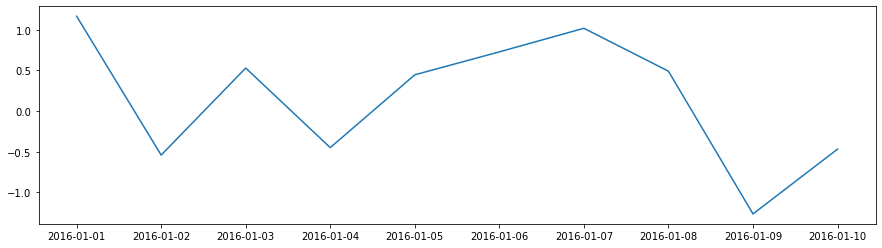

In [47]:
plt.figure(figsize=(15, 4))
plt.plot(s)
plt.show()

Более подробно ознакомиться с методами можно [в официальной документации](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html). 

### 2. Тип данных `DataFrame`

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [48]:
d = {'one': pd.Series(range(6), index=list('abcdef')),
     'two': pd.Series(range(7), index=list('abcdefg')),
     'three': pd.Series(sps.norm.rvs(size=7), index=list('abcdefg'))}
df = pd.DataFrame(d)
df

,one,two,three
a,0.0,0,0.802221
b,1.0,1,-0.371582
c,2.0,2,-1.480862
d,3.0,3,2.511876
e,4.0,4,0.394184
f,5.0,5,-0.017757
g,NaN,6,0.714814


Таблица с несколькими разными типами данных

In [49]:
df2 = pd.DataFrame({ 'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)),
                                    dtype='float32'),
                     'D': np.array([3] * 4, 
                                   dtype='int32'),
                     'E': pd.Categorical(["test", "train",
                                          "test", "train"]),
                     'F': 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [50]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#### 2.1 Данные

Вернемся к первой таблице и посмотрим на ее начало и конец

In [51]:
df.head()

,one,two,three
a,0.0,0,0.802221
b,1.0,1,-0.371582
c,2.0,2,-1.480862
d,3.0,3,2.511876
e,4.0,4,0.394184


In [52]:
df.tail(3)

,one,two,three
e,4.0,4,0.394184
f,5.0,5,-0.017757
g,NaN,6,0.714814


Индексы

In [53]:
df.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

Названия колонок

In [54]:
df.columns

Index(['one', 'two', 'three'], dtype='object')

Получение обычной матрицы данных

In [55]:
df.values

array([[ 0.        ,  0.        ,  0.80222145],
       [ 1.        ,  1.        , -0.37158246],
       [ 2.        ,  2.        , -1.48086245],
       [ 3.        ,  3.        ,  2.5118757 ],
       [ 4.        ,  4.        ,  0.39418422],
       [ 5.        ,  5.        , -0.01775738],
       [        nan,  6.        ,  0.71481365]])

Описательные статистики

In [56]:
df.describe()

,one,two,three
count,6.000000,7.000000,7.000000
mean,2.500000,3.000000,0.364699
std,1.870829,2.160247,1.226086
min,0.000000,0.000000,-1.480862
25%,1.250000,1.500000,-0.194670
50%,2.500000,3.000000,0.394184
75%,3.750000,4.500000,0.758518
max,5.000000,6.000000,2.511876


Транспонирование данных

In [57]:
df.T

,a,b,c,d,e,f,g
one,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,NaN
two,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
three,0.802221,-0.371582,-1.480862,2.511876,0.394184,-0.017757,0.714814


Сортировка по столбцу

In [58]:
df.sort_values(by='three', ascending=False)

,one,two,three
d,3.0,3,2.511876
a,0.0,0,0.802221
g,NaN,6,0.714814
e,4.0,4,0.394184
f,5.0,5,-0.017757
b,1.0,1,-0.371582
c,2.0,2,-1.480862


**Упражнение:** Сгенерируйте массив точек в 3D, создайте по нему датафрейм и отсортируйте строки лексикографически.

In [69]:
# МОЙ КОД
data = sps.norm.rvs(size = (100,3))
temp = pd.DataFrame(data, columns = ['x', 'y', 'z'])
temp.sort_values(by = ['x', 'y', 'z'])

,x,y,z
82,-2.955430,0.488652,0.669524
9,-2.415196,0.772517,1.554043
25,-1.539942,-1.155058,0.561135
33,-1.489239,-1.209225,0.970369
45,-1.400973,-0.362592,0.795169
...,...,...,...
20,1.746573,0.774362,-0.332922
15,1.965024,-0.282849,0.018015
78,2.360301,-1.252602,-0.095123
7,2.365075,2.888510,1.457167


In [70]:
# КОД С СЕМИНАРА
pd.DataFrame(
    sps.norm.rvs(size=(100, 3)),
    columns=['x', 'y', 'z']
).sort_values(by=['x', 'y', 'z'])

,x,y,z
30,-3.028502,-1.030352,-0.423511
81,-2.150756,0.708816,0.892686
43,-1.829861,-1.886873,-1.688650
31,-1.678958,-0.940281,-0.948558
65,-1.669325,-0.485104,-1.176782
...,...,...,...
62,1.537249,-0.342840,0.243561
22,1.679104,0.034410,-0.095423
27,1.908446,-1.236260,-0.840389
60,2.327613,-1.655966,0.810120


#### 2.2 Индексация

В отличии от обычной системы индексации в Python и Numpy, в Pandas принята иная система индексации, которая является несколько нелогичной, однако, на практике часто оказывается удобной при обработке сильно неоднородных данных.
Для написания продуктивного кода при обработке большого объема данных стоит использовать атрибуты `.at`, `.iat`, `.loc`, `.iloc`, `.ix`.

Если в качестве индекса указать имя столбца, получится одномерный набор данных типа `Series`.

In [71]:
df['one']

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

К столбцу можно обращаться как к полю объекта, если имя столбца позволяет это сделать.

In [72]:
df.one

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

Индексы полученного одномерного набора данных.

In [73]:
df['one'].index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

У данного столбца есть имя, его можно получить следующим образом.

In [74]:
df['one'].name

'one'

Получение элемента массива

In [75]:
df['one']['c']

2.0

Правила индексации в pandas несколько отличаются от общепринятых. Если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [76]:
df['b':'d']

,one,two,three
b,1.0,1,-0.371582
c,2.0,2,-1.480862
d,3.0,3,2.511876


Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным, хотя и удобно на практике.

In [77]:
df[1:3]

,one,two,three
b,1.0,1,-0.371582
c,2.0,2,-1.480862


Логичнее работает атрибут `loc`: первая позиция &mdash; всегда индекс строки, а вторая &mdash; столбца.

In [78]:
df.loc['b']

one      1.000000
two      1.000000
three   -0.371582
Name: b, dtype: float64

In [79]:
df.loc['b', 'one']

1.0

In [80]:
df.loc['a':'b', 'one']

a    0.0
b    1.0
Name: one, dtype: float64

In [81]:
df.loc['a':'b', :]

,one,two,three
a,0.0,0,0.802221
b,1.0,1,-0.371582


In [82]:
df.loc[:, 'one']

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

Атрибут `iloc` подобен `loc`: первый индекс &mdash; номер строки, второй &mdash; номер столбца. Это целые числа, конец диапазона не включается как обычно в питоне.

In [83]:
df.iloc[2]

one      2.000000
two      2.000000
three   -1.480862
Name: c, dtype: float64

In [84]:
df.iloc[1:3]

,one,two,three
b,1.0,1,-0.371582
c,2.0,2,-1.480862


In [85]:
df.iloc[1:3, 0:2]

,one,two
b,1.0,1
c,2.0,2


Булевская индексация &mdash; выбор строк с заданным условием

In [86]:
df[df.three > 0]

,one,two,three
a,0.0,0,0.802221
d,3.0,3,2.511876
e,4.0,4,0.394184
g,NaN,6,0.714814


**Упражнение**  
Сгенерируйте случайную целочисленную матрицу $n \times m$, где $n=20, m=10$. Создайте из неё датафрейм, пронумеровав столбцы случайной перестановкой чисел из $\{1, \ldots, m\}$. Выберите столбцы с чётными номерами и строки, в которых чётных элементов больше, чем нечётных.  

In [124]:
# МОЙ КОД
n = 20
m = 10
data = sps.binom.rvs(size = (n,m), n = 100, p = 0.5)
l = np.arange(1, m+1)
np.random.shuffle(l)
data = pd.DataFrame(data, columns = l)

# четные столбцы
col = l%2 == 0

# строки
s = np.sum(data%2, axis = 1) <= (m/2)

data.loc[s, col]

,8,4,2,6,10
0,54,51,42,49,42
1,54,52,51,55,48
3,48,43,47,50,47
4,46,53,53,48,54
6,55,56,56,43,58
7,48,48,49,44,53
9,44,49,49,55,54
12,38,51,46,50,55
14,42,53,40,51,51
15,56,52,44,46,39


In [125]:
# КОД С СЕМИНАРА

# создаем матрицу
n, m = 20, 10
data = sps.randint(low=-100, high=100).rvs(size=(n, m))
cols = np.arange(1, m + 1)
np.random.shuffle(cols)

# создаем таблицу
task_df = pd.DataFrame(data, columns=cols)

# задаем условия для строк и столбцов
col_mask = (cols % 2) == 0
row_mask = np.sum(data % 2, axis=1) < (m / 2)

# извлекаем данные по условию
task_df.loc[row_mask, col_mask]

,2,8,4,10,6
0,8,50,-97,70,73
1,88,41,-12,-94,6
3,33,88,18,50,1
4,-4,-32,-67,12,-20
5,34,51,40,14,-48
8,7,90,57,-88,-47
12,76,-14,57,58,28
17,44,-67,-50,-59,-50


#### 2.3 Изменение таблиц

К таблице можно добавлять новые столбцы.

In [126]:
df['4th'] = df['one'] * df['two']
df['flag'] = df['two'] > 2
df

,one,two,three,4th,flag
a,0.0,0,0.802221,0.0,False
b,1.0,1,-0.371582,1.0,False
c,2.0,2,-1.480862,4.0,False
d,3.0,3,2.511876,9.0,True
e,4.0,4,0.394184,16.0,True
f,5.0,5,-0.017757,25.0,True
g,NaN,6,0.714814,NaN,True


И удалять имеющиеся.

In [127]:
del df['two']
df['foo'] = 0
df

,one,three,4th,flag,foo
a,0.0,0.802221,0.0,False,0
b,1.0,-0.371582,1.0,False,0
c,2.0,-1.480862,4.0,False,0
d,3.0,2.511876,9.0,True,0
e,4.0,0.394184,16.0,True,0
f,5.0,-0.017757,25.0,True,0
g,NaN,0.714814,NaN,True,0


Изменение элемента

In [128]:
df.iat[1, 0] = -1

# Эквивалентные формы:
# df['one']['b'] = -1  <--  SettingWithCopyWarning
# df.at['b', 'one'] = -1

df

,one,three,4th,flag,foo
a,0.0,0.802221,0.0,False,0
b,-1.0,-0.371582,1.0,False,0
c,2.0,-1.480862,4.0,False,0
d,3.0,2.511876,9.0,True,0
e,4.0,0.394184,16.0,True,0
f,5.0,-0.017757,25.0,True,0
g,NaN,0.714814,NaN,True,0


Добавим копию столбца `one`, в которую входят только строки до третьей.

In [129]:
df['one_tr'] = df['one'][:3]
df

,one,three,4th,flag,foo,one_tr
a,0.0,0.802221,0.0,False,0,0.0
b,-1.0,-0.371582,1.0,False,0,-1.0
c,2.0,-1.480862,4.0,False,0,2.0
d,3.0,2.511876,9.0,True,0,NaN
e,4.0,0.394184,16.0,True,0,NaN
f,5.0,-0.017757,25.0,True,0,NaN
g,NaN,0.714814,NaN,True,0,NaN


#### 2.4 Пропуски

Удаление всех строк с пропусками

In [130]:
df.dropna(how='any')

,one,three,4th,flag,foo,one_tr
a,0.0,0.802221,0.0,False,0,0.0
b,-1.0,-0.371582,1.0,False,0,-1.0
c,2.0,-1.480862,4.0,False,0,2.0


Замена всех пропусков на значение

In [131]:
df.fillna(value=666)

,one,three,4th,flag,foo,one_tr
a,0.0,0.802221,0.0,False,0,0.0
b,-1.0,-0.371582,1.0,False,0,-1.0
c,2.0,-1.480862,4.0,False,0,2.0
d,3.0,2.511876,9.0,True,0,666.0
e,4.0,0.394184,16.0,True,0,666.0
f,5.0,-0.017757,25.0,True,0,666.0
g,666.0,0.714814,666.0,True,0,666.0


Замена всех пропусков на среднее по столбцу

In [132]:
df.fillna(value=df.mean())

,one,three,4th,flag,foo,one_tr
a,0.000000,0.802221,0.000000,False,0,0.000000
b,-1.000000,-0.371582,1.000000,False,0,-1.000000
c,2.000000,-1.480862,4.000000,False,0,2.000000
d,3.000000,2.511876,9.000000,True,0,0.333333
e,4.000000,0.394184,16.000000,True,0,0.333333
f,5.000000,-0.017757,25.000000,True,0,0.333333
g,2.166667,0.714814,9.166667,True,0,0.333333


Булевская маска пропущенных значений

In [133]:
df.isnull()

,one,three,4th,flag,foo,one_tr
a,False,False,False,False,False,False
b,False,False,False,False,False,False
c,False,False,False,False,False,False
d,False,False,False,False,False,True
e,False,False,False,False,False,True
f,False,False,False,False,False,True
g,True,False,True,False,False,True


#### 2.5 Простые операции

Создадим таблицу из массива случайных чисел.

In [134]:
df1 = pd.DataFrame(sps.uniform.rvs(size=(10, 4)),
                   columns=['A', 'B', 'C', 'D'])
df1

,A,B,C,D
0,0.456405,0.168281,0.432005,0.493440
1,0.884126,0.535100,0.043989,0.112246
2,0.105813,0.310132,0.901167,0.752700
3,0.535994,0.747693,0.974200,0.163911
4,0.574878,0.387202,0.529548,0.519322
5,0.962219,0.567148,0.324925,0.056243
6,0.361028,0.071292,0.468205,0.737522
7,0.671053,0.855244,0.902743,0.655985
8,0.466847,0.077416,0.956310,0.443838
9,0.431396,0.080145,0.830267,0.220025


In [135]:
df2 = pd.DataFrame(sps.uniform.rvs(size=(7, 3)),
                   columns=['A', 'B', 'C'])
df2

,A,B,C
0,0.945341,0.891328,0.154833
1,0.627325,0.480989,0.340098
2,0.155557,0.587372,0.743039
3,0.404230,0.835130,0.845626
4,0.741107,0.031645,0.595715
5,0.007022,0.223755,0.212333
6,0.636237,0.020470,0.408722


In [136]:
df1 + df2

,A,B,C,D
0,1.401746,1.059610,0.586838,NaN
1,1.511451,1.016089,0.384087,NaN
2,0.261370,0.897505,1.644206,NaN
3,0.940224,1.582823,1.819826,NaN
4,1.315985,0.418847,1.125263,NaN
5,0.969241,0.790903,0.537257,NaN
6,0.997265,0.091762,0.876927,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [137]:
2 * df1 + 3

,A,B,C,D
0,3.912810,3.336563,3.864010,3.986880
1,4.768253,4.070200,3.087978,3.224492
2,3.211625,3.620265,4.802334,4.505400
3,4.071989,4.495386,4.948399,3.327821
4,4.149756,3.774403,4.059096,4.038643
5,4.924438,4.134296,3.649850,3.112487
6,3.722056,3.142584,3.936411,4.475043
7,4.342107,4.710488,4.805487,4.311969
8,3.933693,3.154831,4.912619,3.887676
9,3.862792,3.160291,4.660533,3.440049


In [138]:
np.sin(df1)

,A,B,C,D
0,0.440724,0.167488,0.418692,0.473658
1,0.773361,0.509927,0.043975,0.112010
2,0.105615,0.305185,0.784052,0.683612
3,0.510696,0.679949,0.827252,0.163178
4,0.543732,0.377599,0.505143,0.496291
5,0.820462,0.537229,0.319238,0.056214
6,0.353236,0.071232,0.451285,0.672456
7,0.621811,0.754731,0.785029,0.609940
8,0.450073,0.077338,0.817069,0.429409
9,0.418139,0.080060,0.738111,0.218254


Построим графики кумулятивных сумм

In [139]:
cs = df1.cumsum()
cs

,A,B,C,D
0,0.456405,0.168281,0.432005,0.493440
1,1.340531,0.703381,0.475994,0.605686
2,1.446344,1.013514,1.377161,1.358386
3,1.982338,1.761207,2.351361,1.522296
4,2.557216,2.148408,2.880909,2.041618
5,3.519435,2.715556,3.205833,2.097861
6,3.880463,2.786848,3.674039,2.835383
7,4.551517,3.642092,4.576782,3.491368
8,5.018363,3.719508,5.533092,3.935206
9,5.449759,3.799653,6.363358,4.155230


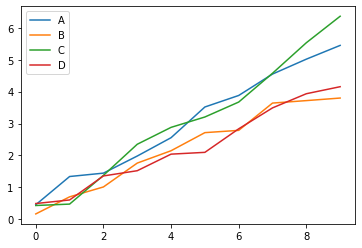

In [140]:
cs.plot()
plt.show()

**Упражнение**   
Сгенерируйте случайную выборку $X_1, \ldots, X_n$ для $n = 100$ из стандартного нормального распределения, соберите из неё `pd.DataFrame`, замените случайные 10% элементов на пропуски (`np.nan`), а затем добавьте по столбцу для оценок первых 4 моментов кумулятивно — $$\frac{1}{m} \sum\limits_{i=1}^{m} X_i^{k}, \; i \in \overline{1, m}, \; m \in  \overline{1, n}, \; k \in \overline{1, 4}$$ 
Ваша функция должна корректно обрабатывать пропуски. В конце постройте график.

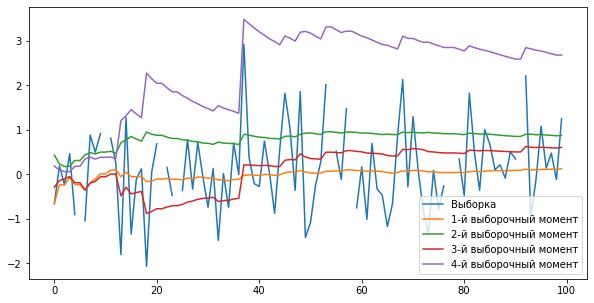

In [141]:
# YOUR CODE

# генерируем выборку
n = 100
sample = sps.norm.rvs(size=n)

# создаем пропуски
index = np.random.choice(np.arange(n), int(0.1 * n), replace=True)
sample[index] = np.nan

# заводим dataframe
sample_df = pd.DataFrame(sample, columns=['Выборка'])


for k in range(1, 5):
    sample_df['{}-й выборочный момент'.format(k)] = (
        sample_df['Выборка'] ** k
    ).expanding().apply(np.nanmean)
    
sample_df.plot(figsize=(10, 5));

### 3. Чтение и запись данных

**Загрузка текстовых файлов табличного вида** производится с помощью функции `pd.read_csv`. Основные аргументы следующие:
* `filepath_or_buffer` &mdash; пусть к файлу;
* `sep` &mdash; разделитель колонок в строке (запятая, табуляция и т.д.);
* `header` &mdash; номер строки или список номеров строк, используемых в качестве имен колонок;
* `names` &mdash; список имен, которые будут использованы в качестве имен колонок;
* `index_col` &mdash; колонка, используемая в качестве индекса;
* `usecols` &mdash; список имен колонок, которые будут загружены;
* `nrows` &mdash; сколько строк прочитать;
* `skiprows` &mdash; номера строк с начала, которые нужно пропустить;
* `skipfooter` &mdash; сколько строк в конце пропустить;
* `na_values` &mdash; список значений, которые распознавать как пропуски;
* `parse_dates` &mdash; распознавать ли даты, можно передать номера строк;
* `date_parser` &mdash; парсер дат;
* `dayfirst` &mdash; день записывается перед месяцем или после;
* `thousands` &mdash; разделитель тысяч;
* `decimal` &mdash; разделитель целой и дробной частей;
* `comment` &mdash; символ начала комментария.

Полный список параметров:

`pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)`

**Загрузка таблиц формата Excel** производится с помощью функции `pd.read_excel`. Основные аргументы следующие:
* `io` &mdash; пусть к файлу;
* `sheetname` &mdash; какие листы таблицы загрузить;
* Остальные параметры аналогично.

`pd.read_excel(io, sheetname=0, header=0, skiprows=None, skip_footer=0, index_col=None, names=None, parse_cols=None, parse_dates=False, date_parser=None, na_values=None, thousands=None, convert_float=True, has_index_names=None, converters=None, dtype=None, true_values=None, false_values=None, engine=None, squeeze=False, **kwds)`

**Запись таблицы в текстовый файл** производится с помощью функции `df.to_csv`. Основные аргументы следующие:
* `df` &mdash; DataFrame, который нужно записать;
* `path_or_buf` &mdash; путь, куда записать;
* `sep` &mdash; разделитель колонок в строке (запятая, табуляция и т.д.);
* `na_rep` &mdash; как записать пропуски;
* `float_format` &mdash; формат записи дробных чисел;
* `columns` &mdash; какие колонки записать;
* `header` &mdash; как назвать колонки при записи;
* `index` &mdash; записывать ли индексы в файл;
* `index_label` &mdash; имена индексов, которые записать в файл.

Полный список параметров:

`df.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=False, date_format=None, doublequote=True, escapechar=None, decimal='.')`

**Запись таблицы в формат Excel** производится с помощью функции `df.to_excel`. Основные аргументы аналогичные. Полный список параметров:

`df.to_excel(excel_writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True, freeze_panes=None)`

### 4. Примеры чтения данных и работы с датами

Прочитаем файл, который содержит два столбца &mdash; дата и число. Столбцы разделяются табуляцией.

In [76]:
df = pd.read_csv('./example.csv', sep='\t', parse_dates=[0])
df.head()

,Time,Value
0,2019-01-09,66
1,2019-02-09,34
2,2019-03-09,18
3,2019-04-09,32
4,2019-05-09,84


В информации о таблице видим, что дата определилась, т.к. формат колонки `Time` обозначен как `datetime64[ns]`.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
Time     18 non-null datetime64[ns]
Value    18 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 416.0 bytes


Но при печати понимаем, что часть дат распозналась неправильно. Если число месяца меньше 13, то pandas путает день и месяц. В одном и том же столбце. Кошмар...

In [78]:
df['Time']

0    2019-01-09
1    2019-02-09
2    2019-03-09
3    2019-04-09
4    2019-05-09
5    2019-06-09
6    2019-07-09
7    2019-08-09
8    2019-09-09
9    2019-10-09
10   2019-11-09
11   2019-12-09
12   2019-09-13
13   2019-09-14
14   2019-09-15
15   2019-09-16
16   2019-09-17
17   2019-09-18
Name: Time, dtype: datetime64[ns]

Укажем, что день всегда следует первым. Теперь все правильно

In [79]:
df = pd.read_csv('./example.csv', sep='\t', parse_dates=[0],
                 dayfirst=True)
df['Time']

0    2019-09-01
1    2019-09-02
2    2019-09-03
3    2019-09-04
4    2019-09-05
5    2019-09-06
6    2019-09-07
7    2019-09-08
8    2019-09-09
9    2019-09-10
10   2019-09-11
11   2019-09-12
12   2019-09-13
13   2019-09-14
14   2019-09-15
15   2019-09-16
16   2019-09-17
17   2019-09-18
Name: Time, dtype: datetime64[ns]

Панды довольно ленивые, и если не попросить pandas распознать дату, то ничего делать не будет &mdash; оставит ее как `object`.

In [80]:
df = pd.read_csv('./example.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
Time     18 non-null object
Value    18 non-null int64
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


Тогда можно воспользоваться функцией `pd.to_datetime`

In [81]:
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)
df['Time']

0    2019-09-01
1    2019-09-02
2    2019-09-03
3    2019-09-04
4    2019-09-05
5    2019-09-06
6    2019-09-07
7    2019-09-08
8    2019-09-09
9    2019-09-10
10   2019-09-11
11   2019-09-12
12   2019-09-13
13   2019-09-14
14   2019-09-15
15   2019-09-16
16   2019-09-17
17   2019-09-18
Name: Time, dtype: datetime64[ns]

Установим дату как индекс, получив временной ряд.

In [82]:
df = df.set_index('Time')
df

,Value
Time,
2019-09-01,66
2019-09-02,34
2019-09-03,18
2019-09-04,32
2019-09-05,84
2019-09-06,27
2019-09-07,45
2019-09-08,84
2019-09-09,42


Его можно нарисовать

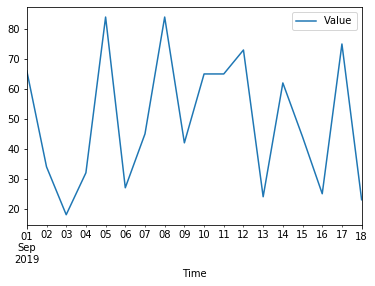

In [83]:
df.plot();

Усреднение данных по трем дням

In [84]:
df.resample('3D').mean()

,Value
Time,
2019-09-01,39.333333
2019-09-04,47.666667
2019-09-07,57.000000
2019-09-10,67.666667
2019-09-13,43.333333
2019-09-16,41.000000


### 5. Интервалы времени

Интервал времени задается объектом `pd.Timedelta`

Возможные обозначения интервалов: `'Y', 'M', 'W', 'D', 'days', 'day', 'hours', hour', 'hr', 'h', 'm', 'minute', 'min', 'minutes', 'T', 'S', 'seconds', 'sec', 'second', 'ms', 'milliseconds', 'millisecond', 'milli', 'millis', 'L', 'us', 'microseconds', 'microsecond', 'micro', 'micros', 'U', 'ns', 'nanoseconds', 'nano', 'nanos', 'nanosecond', 'N'`

Например, интервал времени в 5 недель 6 дней 5 часов 37 минут 23 секунды 12 милисекунд:

In [85]:
pd.Timedelta('5W 6 days 5hr 37min 23sec 12ms')

Timedelta('41 days 05:37:23.012000')

Поробуем понять что такое `Y` и `M`.

In [86]:
pd.Timedelta('1Y'), pd.Timedelta('1M')

(Timedelta('365 days 05:49:12'), Timedelta('0 days 00:01:00'))

Символ `Y` обозначает год. Он сделан таким из-за високосных годов. Поскольку месяцы разной длины, то их вообще нельзя здесь задать. Поэтому `M` обозначает минуты.

Интервал можно добавить к какой-нибудь дате, или вычесть из нее.

In [87]:
pd.to_datetime('2019.09.18 18:30') \
    + pd.Timedelta('8hr 37min 23sec 12ms')

Timestamp('2019-09-19 03:07:23.012000')

In [88]:
pd.to_datetime('2019.09.18 18:30') \
    - pd.Timedelta('20hr 50min 23sec 12ms')

Timestamp('2019-09-17 21:39:36.988000')

Сделать регулярный список дат позволяет функция `pd.timedelta_range`, которая реализует функционал `range` для дат. Ей нужно передать **ровно три аргумента** из следующих четырех:
* `start` &mdash; интервал начала отчета;
* `end` &mdash; интервал окончания отчета;
* `periods` &mdash; количество интервалов;
* `freq` &mdash; частота отсчета.

**Пример** 
<img src="https://mipt-stats.gitlab.io/images/m/temperature.jpg" width="140" align="right">  
Врач на протяжении дня измеряет пациенту температуру каждые 3 часа в течение 2 недель. Также пациенту необходимо спать с 11 вечера до 7 утра. Каждый день измерения температуры начинаются в 8 часов. Первое измерение 22 марта 2020 года. Определите моменты времени, когда нужно измерить пациенту температуру.

In [89]:
# Периоды измерения температуры днем
periods = pd.timedelta_range(start='8H', freq='3H', end='23H')
periods

TimedeltaIndex(['08:00:00', '11:00:00', '14:00:00', '17:00:00', '20:00:00',
                '23:00:00'],
               dtype='timedelta64[ns]', freq='3H')

In [90]:
# Даты измерний температуры
dates = pd.to_datetime('2020.03.22') \
    + pd.timedelta_range(start=0, freq='1D', end='2W')
dates

DatetimeIndex(['2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04', '2020-04-05'],
              dtype='datetime64[ns]', freq='D')

In [91]:
# Время измерния температуры
n, m = len(dates), len(periods)
dates_new = dates.repeat(m)
periods_new = pd.to_timedelta(np.tile(periods, n))
time = dates_new + periods_new
time

DatetimeIndex(['2020-03-22 08:00:00', '2020-03-22 11:00:00',
               '2020-03-22 14:00:00', '2020-03-22 17:00:00',
               '2020-03-22 20:00:00', '2020-03-22 23:00:00',
               '2020-03-23 08:00:00', '2020-03-23 11:00:00',
               '2020-03-23 14:00:00', '2020-03-23 17:00:00',
               '2020-03-23 20:00:00', '2020-03-23 23:00:00',
               '2020-03-24 08:00:00', '2020-03-24 11:00:00',
               '2020-03-24 14:00:00', '2020-03-24 17:00:00',
               '2020-03-24 20:00:00', '2020-03-24 23:00:00',
               '2020-03-25 08:00:00', '2020-03-25 11:00:00',
               '2020-03-25 14:00:00', '2020-03-25 17:00:00',
               '2020-03-25 20:00:00', '2020-03-25 23:00:00',
               '2020-03-26 08:00:00', '2020-03-26 11:00:00',
               '2020-03-26 14:00:00', '2020-03-26 17:00:00',
               '2020-03-26 20:00:00', '2020-03-26 23:00:00',
               '2020-03-27 08:00:00', '2020-03-27 11:00:00',
               '2020-03-

---

При подготовке использованы материалы https://inp.nsk.su/~grozin/python/ и http://pandas.pydata.org/pandas-docs/stable/10min.html